### Introduction 

Suppose that we are statistical consultants hired by a
client to provide advice on how to improve sales of a particular product. The
`Advertising` data set consists of the sales of that product in 200 different
markets, along with advertising budgets for the product in each of those
markets for three different media: `TV`, `radio`, and `newspaper`.
It is not possible for our client to directly increase
sales of the product. On the other hand, they can control the advertising
expenditure in each of the three media. Therefore, if we determine that
there is an association between advertising and sales, then we can instruct
our client to adjust advertising budgets, thereby indirectly increasing sales.
In other words, our goal is to develop an accurate model that can be used
to predict sales on the basis of the three media budgets.


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## DATA
### Read in data using Pandas to create a data frame. 

The data frame is analgous to a matrix (which can only be of one data type)of data, however the data frame may contain strings, floats, etc. and other types of variables within it simultaneously. We can preview the head of this data:


In [28]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the dimensions of the data frame?

In [29]:
data.shape

(200, 4)

What are the features of these four columns of data?

In [30]:
print(data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


We see that there are advertising dollars spent in the thousands for different media: 'TV', 'radio', and 'newspaper'. Also, the 'sales' of a product in a given market (the response variable).

Now, lets see what the relationship of each variable is with the response variable:

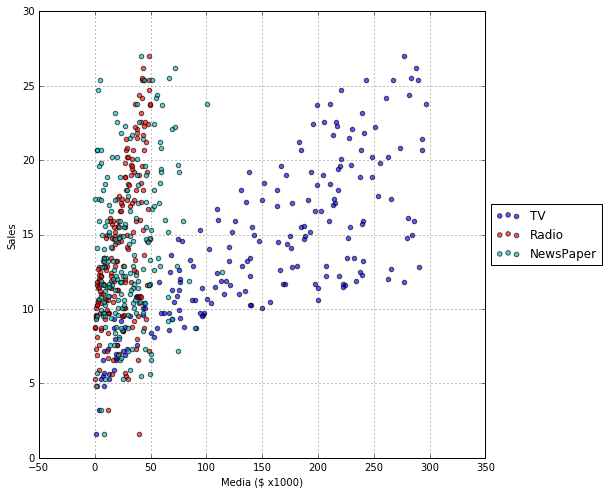

In [31]:
#fig, axs = plt.subplots(1, 2, sharey=True)
fig = plt.figure()
ax1 = fig.add_subplot(111)

data.plot(kind='scatter', x='TV',        y='Sales', c='b', label='TV',   alpha=0.65, ax=ax1, figsize=(8, 8))
data.plot(kind='scatter', x='Radio',     y='Sales', c='r', label='Radio',alpha=0.65, ax=ax1)
data.plot(kind='scatter', x='Newspaper', y='Sales', c='c', label='NewsPaper',alpha=0.65, ax=ax1)
plt.xlabel('Media ($ x1000)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Correlation
Lets find the correlation of each column with 'Sales' to see which variables might predict 'Sales' the best. Looking at the data, we can qualitatively see that each variable has some linear relationship with Sales, however the correlation coefficient might tell us a little bit more about _which_ variable scales the best with Sales. 

The output is the *R-squared* value, where the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. 


In [32]:
data.corr()["Sales"]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

Notably, dollars spent on TV advertising scales 'most linearly' with Sales. However, the response of this variable is still unknown. Ie, qualitatively from the plot above, we see that a greater amount of advertising money is possibly required in order to result in equvilent Sales as Newspaper or Radio. 

## Linear regression 
Linear regression can be used to predict the target variable using linear combinations of the predictor variables. It offers a more specific relationship between the variables. 

### First, we split our data into training and testing sets. 
We do this to avoid overfitting. We want the algorithm to learn gerneralized rules to make predictions, not memorize how to make a specific prediction for when unknown data is outside of the known data set. (ie, if we know that `1+1=2` and `2+2=4`, you can answer `1+1` and `2+2` with zero error, but could you solve `3+3` using this knowledge?)

In [33]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = data.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = data.loc[~data.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

# sort data just for TV advertising
TV_test_X = test.TV
TV_test_Y = test.Sales
TV_train_X = train.TV
TV_train_Y = train.Sales
print(TV_train_X.shape)
print(TV_train_Y.shape)

TV_train_X.reshape(-1, 1);
TV_train_Y.reshape(-1, 1);

(160, 4)
(40, 4)
(160,)
(160,)


### Secondly, we define a linear regression model. 
Note, Linear regression only works well when the predictor variables and the target variable are linearly correlated. We already checked linearity with the correlation coefficient, and all data appeared to be at least somewhat linearly correlated. 

In [34]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Sales","type", "name"]]

# Store the variable we'll be predicting on.
target = "Sales"

# Create linear regression object
model = LinearRegression()
# Fit the model to data.
model.fit(train[columns], train[target])

# print coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [  4.63412128e-02   1.84621854e-01   1.31469965e-04]


#### All data
If we first just consider all of the data, and ignore trying to make future predictions (from split test/train sets):

Intercept: 7.03
Coefficients: 0.05
R^2: 0.61
Mean squared error: 10.51


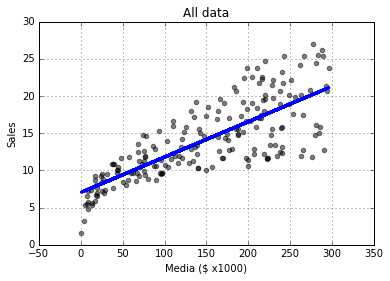

In [35]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# Plot outputs
plt.scatter(X, y,  color='black', alpha=0.5)
plt.plot(X, lm.predict(X), color='blue',
         linewidth=3)
plt.xlabel('Media ($ x1000)')
plt.ylabel('Sales')
plt.title('All data')
plt.grid()

# print intercept and coefficients
print("Intercept: %.2f"
      % lm.intercept_)
print("Coefficients: %.2f"
      % lm.coef_)
zip(feature_cols, lm.coef_);
# calculate the R-squared
print("R^2: %.2f"
      % lm.score(X, y))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X) - y) ** 2))

#### Regression and plot for each variable
Second lets model so that we can make future predictions (using only split test/train sets):

In [50]:
from sklearn.metrics import mean_squared_error
# to simplify and save space, i compressed the regression model, 
#   plotting, and analysis into a single function... see the 
#   next section for running this function
def linRegress(mediaType):
    if isinstance(mediaType, str):  
        mediaType = mediaType
    else:
        mediaType = str(mediaType)
    #=====================================
    # regresssion model:
    # split data into training and testing
    feature_cols = [mediaType]
    X_train = train[feature_cols]
    y_train = train.Sales
    X_test = test[feature_cols]
    y_test = test.Sales
    # Create linear regression object
    lm2 = LinearRegression()
    # Train the model using the training sets
    lm2.fit(X_train, y_train)
    # make predictions using training data for test data
    pred = lm2.predict(X_test)
    #=====================================
    # plot
    plotEval(X_test,y_test,X_train,y_train,pred,mediaType)
    #=====================================
    # evaluate
    print('>> ' +str(mediaType)+ '....')
    # print intercept and coefficients
    print("  Intercept: %.2f"
          % lm2.intercept_)
    print("  Coefficients: %.2f"
          % lm2.coef_)
    zip(feature_cols, lm2.coef_);
    # calculate the R-squared
    print("  R^2: %.2f"
          % lm2.score(X_train, y_train))
    # The mean squared error
    print("  Mean squared error: %.2f"
          % np.mean((lm2.predict(X_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('  Variance score: %.2f' 
          % lm2.score(X_test, y_test))
    MSE(pred,y_test,mediaType)
# plot ======================================
def plotEval(X_test,y_test,X_train,y_train,pred,mediaType):
    # Plot outputs
    fig = plt.figure()
    fig.figsize=(8, 8)
    plt.scatter(X_test, y_test,  color='black',alpha=0.65, label = 'test data')
    plt.scatter(X_train, y_train, c=np.random.rand(3,1),alpha=0.45, label = 'train data')
    plt.plot(X_test, pred, color='black',
             linewidth=2, label = 'regress')
    plt.xlabel('Media ($ x1000)')
    plt.ylabel('Sales')
    plt.title('Data'+ ' ' +str(mediaType))
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# MSE ======================================
def MSE(pred,y_test,mediaType):
    MSEval = mean_squared_error(pred, y_test)
    print(mediaType + ': Mean squared error = ' +str(MSEval))

Now we can simply edit the `mediaType` variable to see how well the linear regression is doing. Which media sources can be used to predict the return of sales for the given dollars spent on advertising using linear regression? 

>> TV....
  Intercept: 7.00
  Coefficients: 0.05
  R^2: 0.61
  Mean squared error: 11.72
  Variance score: 0.62
TV: Mean squared error = 11.7197957051
>> Radio....
  Intercept: 9.54
  Coefficients: 0.19
  R^2: 0.31
  Mean squared error: 18.31
  Variance score: 0.41
Radio: Mean squared error = 18.3082384276
>> Newspaper....
  Intercept: 12.54
  Coefficients: 0.05
  R^2: 0.04
  Mean squared error: 28.53
  Variance score: 0.08
Newspaper: Mean squared error = 28.5252693707


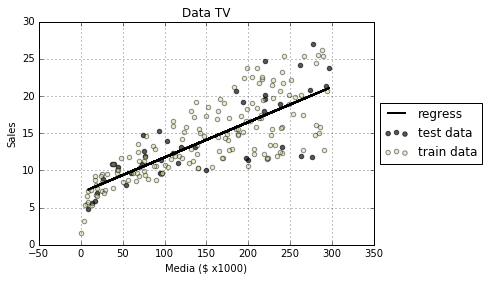

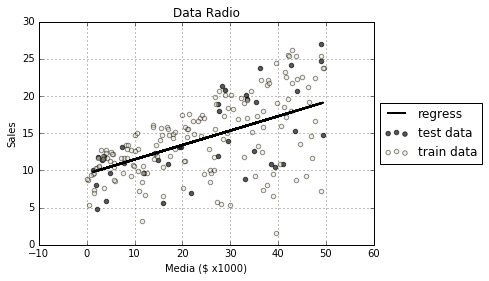

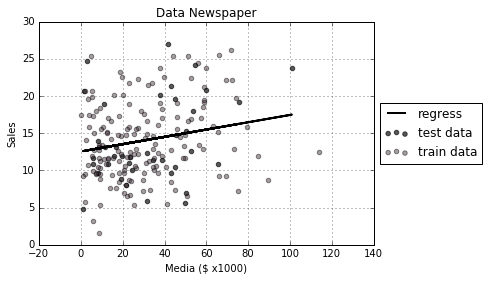

In [51]:
feature_cols = ['TV','Radio','Newspaper']
for i in range(len(feature_cols)):  
    linRegress(feature_cols[i])

### Random forest
We can try a different model using a random forest algorithm. The random forest algorithm can find nonlinearities in data that a linear regression wouldn’t be able to pick up on. Can we reduce the mean squared error (the average error for each prediction), especially for the Newspaper media source?

In [48]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def randForest(mediaType):
    if isinstance(mediaType, str):  
        mediaType = mediaType
    else:
        mediaType = str(mediaType)
    # split data into training and testing
    feature_cols = [mediaType]
    X_train = train[feature_cols]
    y_train = train.Sales
    X_test = test[feature_cols]
    y_test = test.Sales
    # Initialize the model with some parameters.
    model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
    # Fit the model to the data.
    model.fit(X_train, y_train)
    # Make predictions.
    predictions = model.predict(X_test)
    # Compute the error.
    MSE = mean_squared_error(predictions, y_test)
    print(mediaType + ': Mean squared error = ' +str(MSE))

In [49]:
feature_cols = ['TV','Radio','Newspaper']
for i in range(len(feature_cols)):  
    randForest(feature_cols[i])

TV: Mean squared error = 14.0253903744
Radio: Mean squared error = 19.0135329111
Newspaper: Mean squared error = 26.7354048055
